### 목표
- 페암환자의 생존을 예측하는 분류모델을 만들어보자
- 다층퍼셉트론(신경망)을 활용하여 이진 분류 문제를 해결해보자

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

In [2]:
# 랜덤 고정값 설정
np.random.seed(3)
tf.random.set_seed(3)

#### 데이터 불러오기
- header : 데이터를 불러오면서 컬럼명 설정해주는 키워드(None : 인덱스 번호로 컬럼명 출력)

In [4]:
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/data/ThoraricSurgery.csv', header=None)

In [7]:
data.head()
# data.shape # (470, 18)

# 앞 17개 정보 : 문제, 특성, 속성(종양유형, 폐활량, 고통정도, 기침 등..환자 데이터)
# 마지막 18번째 컬럼(17인텍스 컬럼) : 답, 레이블(수술 후 생존 결과)
# 사망 0 / 생존 1

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
0,293,1,3.80,2.80,0,0,0,0,0,0,12,0,0,0,1,0,62,0
1,1,2,2.88,2.16,1,0,0,0,1,1,14,0,0,0,1,0,60,0
2,8,2,3.19,2.50,1,0,0,0,1,0,11,0,0,1,1,0,66,1
3,14,2,3.98,3.06,2,0,0,0,1,1,14,0,0,0,1,0,80,1
4,17,2,2.21,1.88,0,0,1,0,0,0,12,0,0,0,1,0,56,0


#### 데이터 분할
- 문제, 답
- 훈련용, 테스트용

In [11]:
X = data.iloc[:,:-1]
y = data[17]
print(X.shape,y.shape)

(470, 17) (470,)


In [12]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.3,random_state=5)
print(X_train.shape,y_train.shape)
print(X_test.shape,y_test.shape)

(329, 17) (329,)
(141, 17) (141,)


#### Keras 활용하여 딥러닝 신경망 구축
- 1. 신경망 구조 설계(뼈대구성, 층구성)
- 2. 학습 / 평가 방법 설정
- 3. 모델 학습 + 학습 현황 시각화
- 4. 모델 평가 및 예측

In [13]:
from tensorflow.keras import Sequential # 뼈대구성
from tensorflow.keras.layers import Dense

In [14]:
# 1. 신경망 구조 설계
model = Sequential()

# 입력층 + 중간층1
# 특성의 개수 설정 : input_dim = 17, input_shape
# 뉴런의 개수 설정 : units
# 활성화 함수 : activation(들어온 자극(데이터)에 대한 응답여부를 결정하는 함수)
model.add(Dense(units=10, input_dim=17, activation ='sigmoid'))

# 중간층(은닉층)
model.add(Dense(6,activation='sigmoid'))  # 하나의 퍼셉트론층
model.add(Dense(4,activation='sigmoid'))  # 하나의 퍼셉트론층

# 출력층
# 회귀 활성화 함수 : lineat(생략), 이진분류 : sigmoid, 다중분류는 달라질 수 있음
# 회귀(활성화함수x) : 선형모델이 예측한 연속적인 값을 그대로 출력
model.add(Dense(1, activation='sigmoid'))

# 모델 정보 요약 확인
model.summary()



Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 10)                180       
                                                                 
 dense_1 (Dense)             (None, 6)                 66        
                                                                 
 dense_2 (Dense)             (None, 4)                 28        
                                                                 
 dense_3 (Dense)             (None, 1)                 5         
                                                                 
Total params: 279
Trainable params: 279
Non-trainable params: 0
_________________________________________________________________


#### 활성화 함수(activation): 자극에 대한 반응 여부 결정
- 회귀: linear -> 신경망에서 도출된 수치(결과)값 그대로 예측값으로 활용
- 분류 
  - 딥러닝은 선형모델 기반이어서, 여기서 도출된 수치값으로는 분류 문제를 예측하기가 힘듬
  - linear외에 다른 함수를 연결해야함
  - 확률 정보를 가지고 판단하는 것이 정확
  - 이진분류 : sigmoid -> 0 또는 1 분류(0.5 값을 기준으로 높고 낮은지에 대한 확률 정보를 보고 최종 출력을 결정)


In [15]:
# 2. 학습/ 평가 방법 설정
model.compile(loss='binary_crossentropy',
              optimizer='sgd', # 확률적 경사하강법
              metrics= ['accuracy']) # 성능 측정 지표

In [ ]:
# 3. 모델 학습
# 반복횟수 100 epochs
h = model.fit(X_train,y_train,epochs=100)

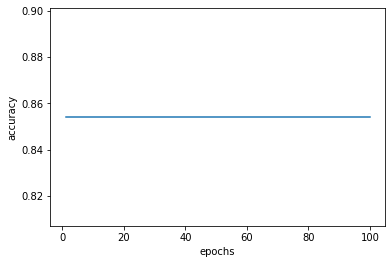

In [20]:
# acc 시각화
plt.plot(range(1,101),h.history['accuracy'])
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.show()

In [21]:
# 4. 모델 평가
# evaluate()
model.evaluate(X_test, y_test)

5/5 [==============================] - 0s 4ms/step - loss: 0.4337 - accuracy: 0.8440


[0.4336879849433899, 0.8439716100692749]

In [26]:
# predict
pre = model.predict(X_test) # 시그모이드를 거치고 확률정보를 출력
pre = pre > 0.5

# accuracy_score()
from sklearn.metrics import accuracy_score, classification_report
accuracy_score(y_test,pre[:,0]) # pre가 2차원이라서 이렇게 처리해줌

# 분류 성능평가 지표 -> 정밀도, 재현율 표 확인 
print(classification_report(y_test,pre[:,0]))


              precision    recall  f1-score   support

           0       0.84      1.00      0.92       119
           1       0.00      0.00      0.00        22

    accuracy                           0.84       141
   macro avg       0.42      0.50      0.46       141
weighted avg       0.71      0.84      0.77       141



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
